In [1]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('TWO_YEARS_SALES.csv')

In [3]:
df['order_date']=pd.to_datetime(df.order_date)

In [4]:
df.fillna(3)

,order_date,sales_id,customer_id,product_id,price_per_unit,quantity,sales,state
0,2021-01-01,1,4,769,109,1.0,109,Northern Territory
1,2021-01-01,2,123,616,112,1.0,112,South Australia
2,2021-01-01,3,143,837,117,1.0,117,Australian Capital Territory
3,2021-01-02,4,94,458,118,3.0,354,Queensland
4,2021-01-02,5,111,660,93,3.0,279,Queensland
...,...,...,...,...,...,...,...,...
2069,2022-12-27,990,140,575,100,1.0,100,Tasmania
2070,2022-12-28,991,157,493,102,2.0,204,Australian Capital Territory
2071,2022-12-29,992,39,148,91,3.0,273,Victoria
2072,2022-12-30,993,108,1193,105,3.0,315,Victoria


In [5]:
df1=df[:1080]

In [6]:
df1

,order_date,sales_id,customer_id,product_id,price_per_unit,quantity,sales,state
0,2021-01-01,1,4,769,109,1.0,109,Northern Territory
1,2021-01-01,2,123,616,112,1.0,112,South Australia
2,2021-01-01,3,143,837,117,1.0,117,Australian Capital Territory
3,2021-01-02,4,94,458,118,3.0,354,Queensland
4,2021-01-02,5,111,660,93,NaN,279,Queensland
...,...,...,...,...,...,...,...,...
1075,2021-12-27,1078,83,260,95,2.0,190,New South Wales
1076,2021-12-28,1079,200,758,109,3.0,327,South Australia
1077,2021-12-29,1080,13,835,117,1.0,117,Northern Territory
1078,2021-12-30,1081,135,730,119,2.0,238,Australian Capital Territory


In [7]:
df2=df[1080:2073]

In [8]:
df2

,order_date,sales_id,customer_id,product_id,price_per_unit,quantity,sales,state
1080,2022-01-01,1,163,43,104,3.0,312,Western Australia
1081,2022-01-02,2,20,571,100,1.0,100,Northern Territory
1082,2022-01-02,3,82,528,98,3.0,294,Northern Territory
1083,2022-01-03,4,115,1196,105,1.0,105,Northern Territory
1084,2022-01-03,5,156,438,107,2.0,214,Northern Territory
...,...,...,...,...,...,...,...,...
2068,2022-12-27,989,95,444,107,1.0,107,Queensland
2069,2022-12-27,990,140,575,100,1.0,100,Tasmania
2070,2022-12-28,991,157,493,102,2.0,204,Australian Capital Territory
2071,2022-12-29,992,39,148,91,3.0,273,Victoria


In [9]:
daily_sales_2021=df1.groupby('order_date').agg({'sales_id': 'first', 'sales': 'sum'}).reset_index()

In [10]:
daily_sales_2022=df2.groupby('order_date').agg({'sales_id': 'first', 'sales': 'sum'}).reset_index()

In [11]:
daily_sales_2022

,order_date,sales_id,sales
0,2022-01-01,1,312
1,2022-01-02,2,394
2,2022-01-03,4,319
3,2022-01-04,6,184
4,2022-01-07,7,351
...,...,...,...
317,2022-12-26,987,234
318,2022-12-27,988,387
319,2022-12-28,991,204
320,2022-12-29,992,273


In [12]:
daily_sales_2021['month'] = daily_sales_2021['order_date'].dt.month
daily_sales_2022['month'] = daily_sales_2022['order_date'].dt.month


In [13]:
monthly_sales_2021=daily_sales_2021.groupby('month').agg({'order_date': 'first', 'sales': 'sum'}).reset_index()

In [14]:
monthly_sales_2021

,month,order_date,sales
0,1,2021-01-01,21533
1,2,2021-02-01,19609
2,3,2021-03-02,23490
3,4,2021-04-01,21581
4,5,2021-05-01,15360
5,6,2021-06-01,20460
6,7,2021-07-01,21942
7,8,2021-08-01,23082
8,9,2021-09-01,21107
9,10,2021-10-01,19275


In [15]:
#daily_sales_2021['month'] = daily_sales_2021['order_date'].dt.month
monthly_sales_2022=daily_sales_2022.groupby('month').agg({'order_date': 'first', 'sales': 'sum'}).reset_index()

In [16]:
monthly_sales_2022

,month,order_date,sales
0,1,2022-01-01,5519
1,2,2022-02-01,19350
2,3,2022-03-02,23681
3,4,2022-04-01,21264
4,5,2022-05-01,16881
5,6,2022-06-01,21376
6,7,2022-07-01,19479
7,8,2022-08-01,21580
8,9,2022-09-01,19681
9,10,2022-10-01,20213


In [17]:
monthly_sales_2021.set_index('order_date',inplace=True)
monthly_sales_2022.set_index('order_date',inplace=True)

In [18]:
two_years=pd.concat([monthly_sales_2021,monthly_sales_2022])

In [19]:
two_years

,month,sales
order_date,,
2021-01-01,1,21533
2021-02-01,2,19609
2021-03-02,3,23490
2021-04-01,4,21581
2021-05-01,5,15360
2021-06-01,6,20460
2021-07-01,7,21942
2021-08-01,8,23082
2021-09-01,9,21107


In [20]:
two_years.drop(two_years.iloc[:,0:1],axis=1)

,sales
order_date,
2021-01-01,21533
2021-02-01,19609
2021-03-02,23490
2021-04-01,21581
2021-05-01,15360
2021-06-01,20460
2021-07-01,21942
2021-08-01,23082
2021-09-01,21107


<AxesSubplot:xlabel='order_date'>

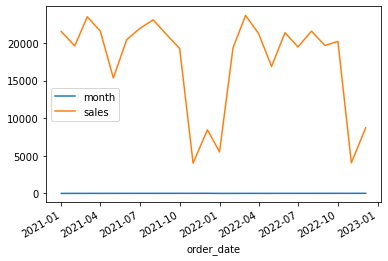

In [21]:
two_years.plot()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(two_years['sales'])

In [24]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test stat','p-value','Lags used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("strong evidence againt null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis,time series has a unit root ,indicating it is non stationary")

In [25]:
adfuller_test(two_years['sales'])

ADF Test stat:-3.463063242198397
p-value:0.008987953834748631
Lags used:9
Number of observations used:14
strong evidence againt null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary


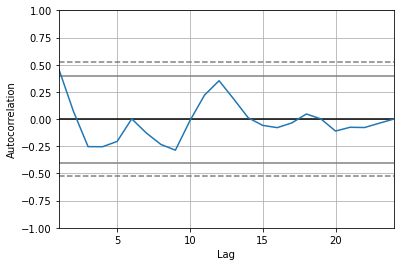

In [26]:
#auto co relative plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(two_years['sales'])
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

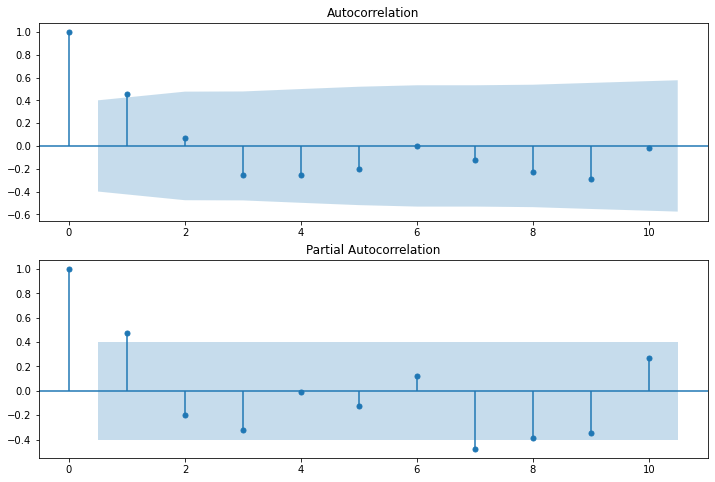

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#for auto correlation
fig = sm.graphics.tsa.plot_acf(two_years['sales'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
#partial auto corr
fig = sm.graphics.tsa.plot_pacf(two_years['sales'].dropna(),lags=10,ax=ax2)

In [29]:
#d=0,p=1,q=2 pdq 202, 101,201 if arima is used only when data is not seasonal.... p=2 , q=ma 2
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(two_years['sales'],order=(2,0,2))
model_fit=model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                   24
Model:                     ARMA(2, 2)   Log Likelihood                -237.125
Method:                       css-mle   S.D. of innovations           4296.303
Date:                Fri, 17 Nov 2023   AIC                            486.249
Time:                        13:14:59   BIC                            493.318
Sample:                             0   HQIC                           488.125
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.76e+04   1404.763     12.531      0.000    1.49e+04    2.04e+04
ar.L1.sales     0.8872      0.163      5.447      0.000       0.568       1.206
ar.L2.sales    -0.8129      0.163     -4.984      0.000      -1.133      -0.493
ma.L1.sales    -0.5109      0.180     -2.832      0.005      -0.865      -0.157
ma.L2.sales     1.0000      0.233      4.299      0.000       0.544       1.456
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5457           -0.9656j            1.1091           -0.1681
AR.2            0.5457           +0.9656j            1.1091            0.1681
MA.1            0.2555           -0.9668j            1.0000           -0.2089
MA.2            0.2555           +0.9668j            1.0000            0.2089
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='order_date'>

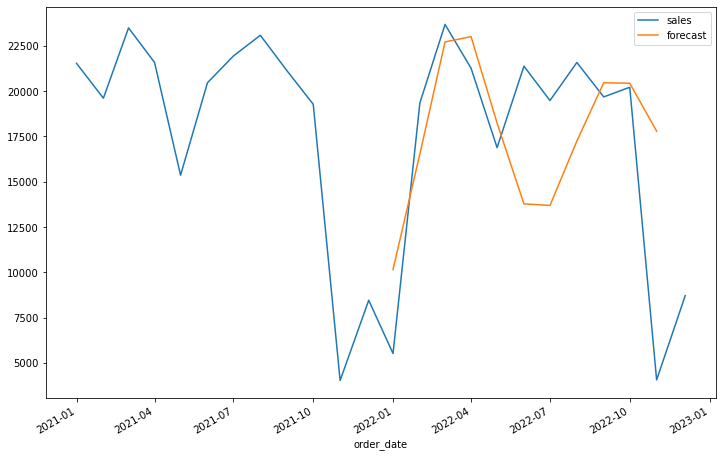

In [32]:
two_years['forecast']=model_fit.predict(start=12,end=22,dynamic=True)
two_years[['sales','forecast']].plot(figsize=(12,8))

In [33]:
import statsmodels.api as sm

In [34]:
model=sm.tsa.statespace.SARIMAX(two_years['sales'],order=(2, 0, 2),seasonal_order=(2,0,2,5))
results=model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed

<AxesSubplot:xlabel='order_date'>

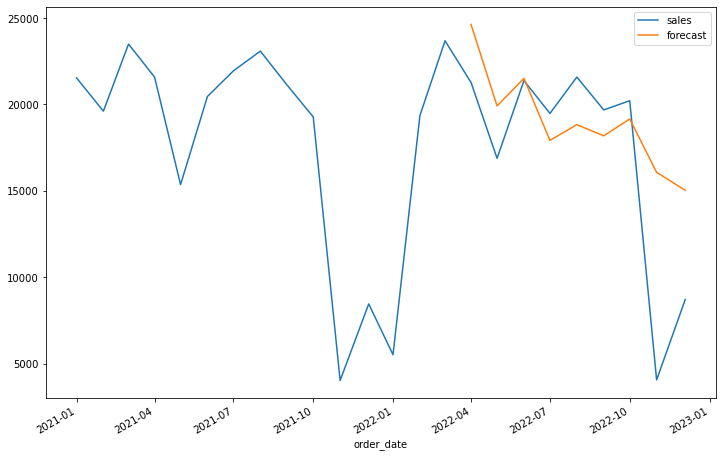

In [35]:
two_years['forecast']=results.predict(start=15,end=23,dynamic=True)
two_years[['sales','forecast']].plot(figsize=(12,8))

In [36]:
from pandas.tseries.offsets import DateOffset
monthly_sales_2023=[two_years.index[-1]+DateOffset(months=x)for x in range(0,12)]

In [37]:
monthly_sales_2023=pd.DataFrame(index=monthly_sales_2023[1:],columns=two_years.columns)

In [38]:
monthly_sales_2023.tail()

,month,sales,forecast
2023-07-04,NaN,NaN,NaN
2023-08-04,NaN,NaN,NaN
2023-09-04,NaN,NaN,NaN
2023-10-04,NaN,NaN,NaN
2023-11-04,NaN,NaN,NaN


In [39]:
#pip install pmdarima

In [40]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'